# VIIRS Download Check

In [1]:
# imports
import seaborn as sns
from matplotlib import pyplot as plt
import xarray
import h5py 

from ulmo import io as ulmo_io
from ulmo.plotting import plotting

# imports
from importlib import reload

from ulmo import io as ulmo_io
import numpy as np
from ulmo import io as ulmo_io
from ulmo.viirs import io as viirs_io
from ulmo.viirs import extract as viirs_extract
from ulmo.plotting import plotting
from ulmo import io as ulmo_io
from ulmo import plotting
from ulmo.llc import io as llc_io
from ulmo.llc import plotting as llc_plotting

from ulmo.utils import image_utils
from ulmo.analysis import figures as ulmo_figs
from ulmo.plotting import plotting as ulmo_plotting

sns.set_style('whitegrid')
sns.set_context('notebook')
pal, cm = plotting.load_palette()

## 2012 Check

In [2]:
viirs_tbl12 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2012_std.parquet')

Read main table: s3://viirs/Tables/VIIRS_2012_std.parquet


In [3]:
viirs_tbl12.head()


filename   row   col       lat  \
0  s3://viirs/data/2012/032/20120201000000-OSPO-L...  5040   960 -0.111252   
1  s3://viirs/data/2012/032/20120201000000-OSPO-L...  5051   899  0.047520   
2  s3://viirs/data/2012/032/20120201000000-OSPO-L...  5089   921  0.267114   
3  s3://viirs/data/2012/032/20120201000000-OSPO-L...  5127  2346 -1.188727   
4  s3://viirs/data/2012/032/20120201000000-OSPO-L...  5136   960  0.514633   

         lon  clear_fraction  field_size   datetime  \
0 -156.94357        0.034370         192 2012-02-01   
1 -156.38885        0.049995         192 2012-02-01   
2 -156.62868        0.049778         192 2012-02-01   
3 -167.94283        0.049669         192 2012-02-01   
4 -157.08434        0.031331         192 2012-02-01   

                                         ex_filename  \
0  s3://viirs/Extractions/VIIRS_2012_95clear_192x...   
1  s3://viirs/Extractions/VIIRS_2012_95clear_192x...   
2  s3://viirs/Extractions/VIIRS_2012_95clear_192x...   
3  s3://viirs/Extractions/VIIRS_2012_95clear_192x...   
4  s3://viirs/Extractions/VIIRS_2012_95clear_192x...   

                                             pp_file    pp_root  pp_idx  \
0  s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...  viirs_std  885541   
1  s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...  viirs_std  529694   
2  s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...  viirs_std  386280   
3  s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...  viirs_std    5160   
4  s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...  viirs_std  149633   

   pp_type  mean_temperature       Tmin       Tmax        T90        T10  \
0        0         25.274851  23.549988  27.100006  25.600006  24.989990   
1        0         25.340801  23.549988  27.859985  25.769989  24.989990   
2        0         25.321354  23.549988  27.279999  25.690002  25.000000   
3        0         26.367399  24.450012  27.369995  26.709991  26.059998   
4        0         25.346376  23.760010  27.350006  25.679993  25.049988   

           LL  
0  152.320679  
1   98.993835  
2  183.892456  
3  254.753418  
4  251.095093

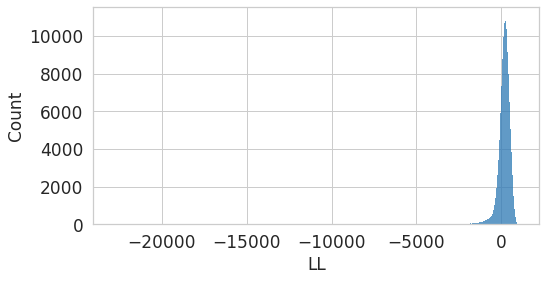

In [5]:
fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl12, x='LL')
plotting.set_fontsize(ax, 17.)
plt.show()

/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


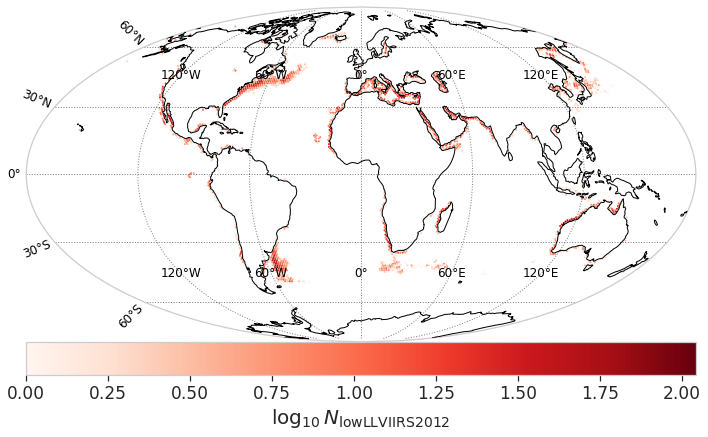

In [7]:
low_LL_V = viirs_tbl12.LL < -1000.
_ = ulmo_figs.show_spatial(viirs_tbl12[low_LL_V], lbl='low LL VIIRS 2012')

In [8]:
ex_file = 's3://viirs/Extractions/VIIRS_2014_95clear_192x192_inpaint.h5'

with ulmo_io.open(ex_file, 'rb') as f:
    ex_hf = h5py.File(f, 'r')

In [3]:
pal, cm = plotting.load_palette()

In [4]:
def plt_ex(extr):
    fig = plt.figure(figsize=(6,12))
    img = plt.imshow(extr, origin='lower', cmap=cm)#, vmin=-3)
    cb = plt.colorbar(img, fraction=0.020, pad=0.04)
    plt.show()

In [13]:
LL = []
for i in range (len(viirs_tbl12)):
    logs = viirs_tbl12.iloc[i].LL
    LL.append(logs)

In [14]:
index1 = LL.index(max(LL))
index2 = LL.index(min(LL))
print('The index the highest LL value is', index1)
print('The index the lowest LL value is', index2)

The index the highest LL value is 648132
The index the lowest LL value is 203417


In [15]:
print(viirs_tbl12.iloc[index1].filename)
print(viirs_tbl12.iloc[index2].filename)

s3://viirs/data/2012/252/20120908035000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc
s3://viirs/data/2012/096/20120405055000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc


In [16]:
high =  ex_hf['fields'][648132,...]
low = ex_hf['fields'][203417,...]

In [ ]:
plt_ex(high)

In [ ]:
plt_ex(low)

In [ ]:
dshigh = xarray.open_dataset(ulmo_io.open(high,'rb'))
dslow = xarray.open_dataset(ulmo_io.open(low,'rb'))

In [ ]:
_ = ulmo_figs.show_spatial(dslow)

## 2014 Check

In [58]:
viirs_tbl14 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2014_std.parquet')

Read main table: s3://viirs/Tables/VIIRS_2014_std.parquet


In [6]:
viirs_tbl14.head()

filename   row   col        lat  \
0  s3://viirs/data/2014/001/20140101000000-OSPO-L...   418  2458  44.377880   
1  s3://viirs/data/2014/001/20140101000000-OSPO-L...   432  2496  44.372460   
2  s3://viirs/data/2014/001/20140101000000-OSPO-L...   508  2487  44.853683   
3  s3://viirs/data/2014/001/20140101000000-OSPO-L...   515  2496  44.876762   
4  s3://viirs/data/2014/001/20140101004000-OSPO-L...  3263    10 -24.942970   

          lon  clear_fraction  field_size            datetime  \
0 -178.670150        0.049967         192 2014-01-01 00:00:00   
1 -179.058010        0.037272         192 2014-01-01 00:00:00   
2 -179.272670        0.049967         192 2014-01-01 00:00:00   
3 -179.369810        0.049805         192 2014-01-01 00:00:00   
4   -7.973459        0.049588         192 2014-01-01 00:40:00   

                                         ex_filename  \
0  s3://viirs/Extractions/VIIRS_2014_95clear_192x...   
1  s3://viirs/Extractions/VIIRS_2014_95clear_192x...   
2  s3://viirs/Extractions/VIIRS_2014_95clear_192x...   
3  s3://viirs/Extractions/VIIRS_2014_95clear_192x...   
4  s3://viirs/Extractions/VIIRS_2014_95clear_192x...   

                                             pp_file    pp_root   pp_idx  \
0  s3://viirs/PreProc/VIIRS_2014_95clear_192x192_...  viirs_std  1005910   
1  s3://viirs/PreProc/VIIRS_2014_95clear_192x192_...  viirs_std   545007   
2  s3://viirs/PreProc/VIIRS_2014_95clear_192x192_...  viirs_std   832786   
3  s3://viirs/PreProc/VIIRS_2014_95clear_192x192_...  viirs_std   167327   
4  s3://viirs/PreProc/VIIRS_2014_95clear_192x192_...  viirs_std   916782   

   pp_type  mean_temperature       Tmin       Tmax        T90        T10  \
0        0          8.583900   7.079987   9.829987   9.119995   7.970001   
1        0          8.625418   7.769989   9.829987   9.109985   8.200012   
2        0          8.378136   7.260010   9.440002   8.850006   7.950012   
3        0          8.374814   7.260010   9.440002   8.889984   7.929993   
4        0         23.500118  21.739990  24.899994  23.910004  23.089996   

           LL  
0  221.975891  
1  198.678406  
2  194.382202  
3  200.585999  
4  233.924011

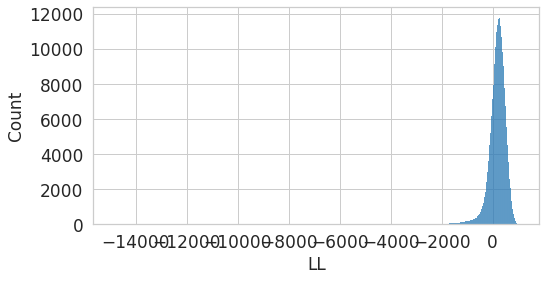

In [7]:
fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl14, x='LL')
plotting.set_fontsize(ax, 17.)
plt.show()

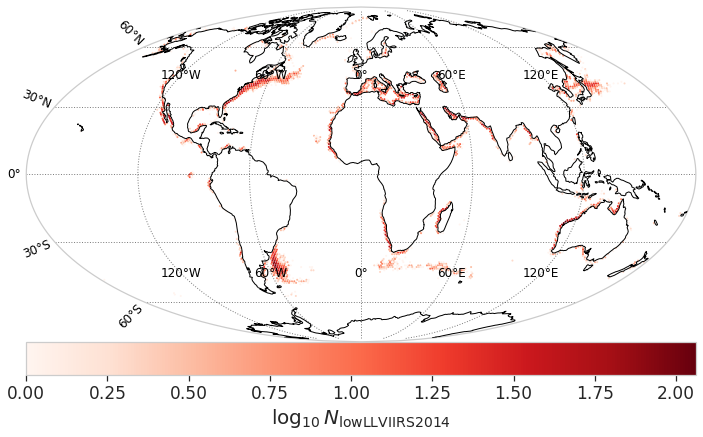

In [9]:
low_LL_V = viirs_tbl14.LL < -1000.
_ = ulmo_figs.show_spatial(viirs_tbl14[low_LL_V], lbl='low LL VIIRS 2014')

In [59]:
ex_file = 's3://viirs/Extractions/VIIRS_2014_95clear_192x192_inpaint.h5'

with ulmo_io.open(ex_file, 'rb') as f:
    ex_hf = h5py.File(f, 'r')

In [11]:
ex_hf.keys()

<KeysViewHDF5 ['fields', 'inpainted_masks', 'metadata']>

In [12]:
ex_hf['fields'].shape

(1088268, 192, 192)

In [13]:
pal, cm = plotting.load_palette()

In [7]:
def plt_ex(extr):
    fig = plt.figure(figsize=(6,12))
    img = plt.imshow(extr, origin='lower', cmap=cm)#, vmin=-3)
    cb = plt.colorbar(img, fraction=0.020, pad=0.04)
    plt.show()

In [61]:
LL = []
for i in range (len(viirs_tbl14)):
    logs = viirs_tbl14.iloc[i].LL
    LL.append(logs)

In [56]:
index1 = LL.index(max(LL))
index2 = LL.index(min(LL))
print('The index the highest LL value is', index1)
print('The index the lowest LL value is', index2)

high = ex_hf['metadata'][484613,]
low =  ex_hf['metadata'][351124,]

NameError: name 'LL' is not defined

In [17]:
print(viirs_tbl15.iloc[index1].filename)
print(viirs_tbl15.iloc[index2].filename)

s3://viirs/data/2014/149/20140529093000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc
s3://viirs/data/2014/102/20140412152000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc


In [55]:
high =  ex_hf['fields'][484613,...]
low = ex_hf['fields'][351124,...]

NameError: name 'ex_hf' is not defined

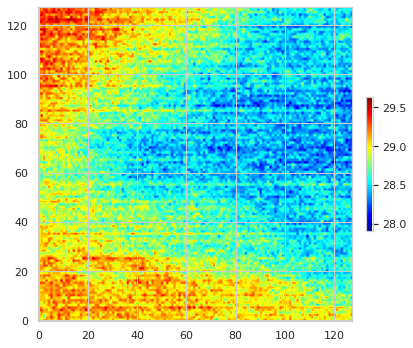

Text(0, 0.5, 'Pixel Values')

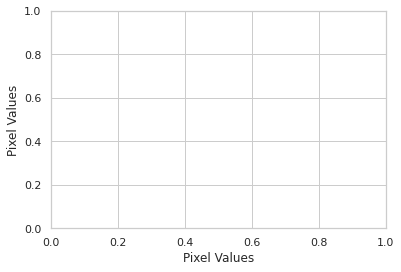

In [54]:
plt_ex(high)
plt.xlabel('Pixel Values')
plt.ylabel('Pixel Values')

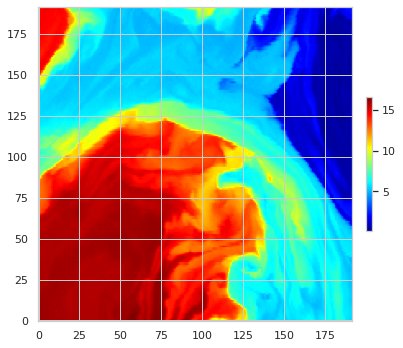

In [28]:
plt_ex(low)

In [29]:
high = 's3://viirs/data/2014/149/20140529093000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc'
low = 's3://viirs/data/2014/102/20140412152000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc'

In [30]:
dshigh = xarray.open_dataset(ulmo_io.open(high,'rb'))
dslow = xarray.open_dataset(ulmo_io.open(low,'rb'))

/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


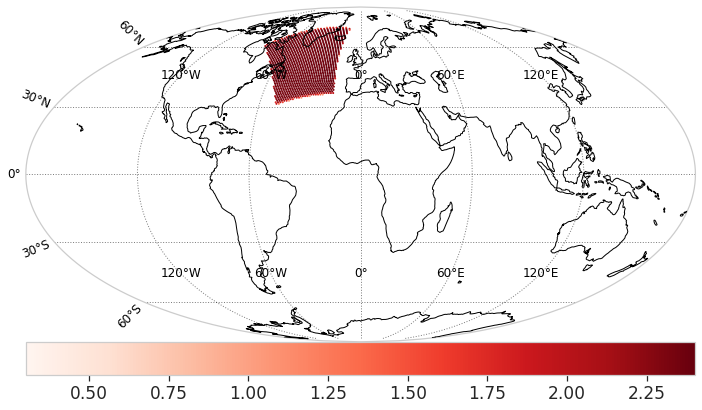

In [32]:
_ = ulmo_figs.show_spatial(dslow)

## 2015 Check

In [5]:
viirs_tbl15 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2015_std.parquet')

Read main table: s3://viirs/Tables/VIIRS_2015_std.parquet


In [35]:
viirs_tbl15.head()

filename   row   col        lat  \
0  s3://viirs/data/2015/001/20150101000000-OSPO-L...  5136  1511 -37.312695   
1  s3://viirs/data/2015/001/20150101000000-OSPO-L...  5136  1536 -37.346410   
2  s3://viirs/data/2015/001/20150101003000-OSPO-L...  2640  2374 -52.999348   
3  s3://viirs/data/2015/001/20150101003000-OSPO-L...  2640  2400 -53.021122   
4  s3://viirs/data/2015/001/20150101003000-OSPO-L...  3121  2479 -49.962010   

          lon  clear_fraction  field_size            datetime  \
0   14.089271        0.049995         192 2015-01-01 00:00:00   
1   14.307197        0.038656         192 2015-01-01 00:00:00   
2 -166.148280        0.048828         192 2015-01-01 00:30:00   
3 -166.596910        0.034451         192 2015-01-01 00:30:00   
4 -168.452180        0.049995         192 2015-01-01 00:30:00   

                                         ex_filename  \
0  s3://viirs/Extractions/VIIRS_2015_95clear_192x...   
1  s3://viirs/Extractions/VIIRS_2015_95clear_192x...   
2  s3://viirs/Extractions/VIIRS_2015_95clear_192x...   
3  s3://viirs/Extractions/VIIRS_2015_95clear_192x...   
4  s3://viirs/Extractions/VIIRS_2015_95clear_192x...   

                                             pp_file    pp_root   pp_idx  \
0  s3://viirs/PreProc/VIIRS_2015_95clear_192x192_...  viirs_std   883277   
1  s3://viirs/PreProc/VIIRS_2015_95clear_192x192_...  viirs_std   190913   
2  s3://viirs/PreProc/VIIRS_2015_95clear_192x192_...  viirs_std  1007196   
3  s3://viirs/PreProc/VIIRS_2015_95clear_192x192_...  viirs_std  1037210   
4  s3://viirs/PreProc/VIIRS_2015_95clear_192x192_...  viirs_std   394514   

   pp_type  mean_temperature       Tmin       Tmax        T90        T10  \
0        0         18.610573  16.220001  21.559998  21.070007  17.630005   
1        0         18.898754  16.220001  21.609985  21.190002  17.700012   
2        0          9.424915   7.299988  10.609985  10.124682   8.950012   
3        0          9.395357   7.299988  10.609985   9.929993   8.959991   
4        0         11.648553   9.299988  12.559998  12.130005  10.660004   

           LL  
0 -343.813477  
1 -507.490906  
2  124.137878  
3  239.659180  
4   95.135010

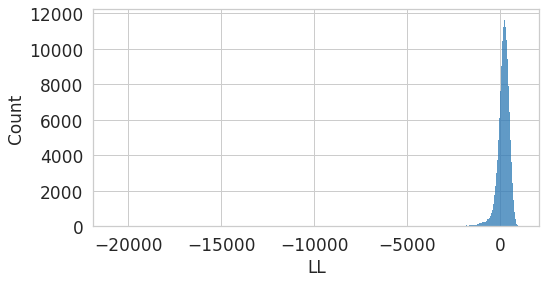

In [36]:
fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl15, x='LL')
plotting.set_fontsize(ax, 17.)
plt.show()

/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


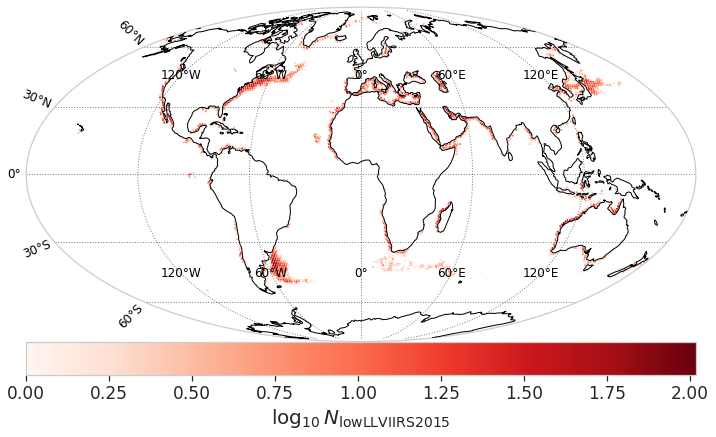

In [6]:
low_LL_V = viirs_tbl15.LL < -1000.
_ = ulmo_figs.show_spatial(viirs_tbl15[low_LL_V], lbl='low LL VIIRS 2015')

In [7]:
LL = []
for i in range (len(viirs_tbl15)):
    logs = viirs_tbl15.iloc[i].LL
    LL.append(logs)

In [8]:
ex_file = 's3://viirs/Extractions/VIIRS_2015_95clear_192x192_inpaint.h5'

with ulmo_io.open(ex_file, 'rb') as f:
    ex_hf = h5py.File(f, 'r')

In [9]:
index1 = LL.index(max(LL))
index2 = LL.index(min(LL))
print('The index the highest LL value is', index1)
print('The index the lowest LL value is', index2)

high = ex_hf['metadata'][855800,]
low =  ex_hf['metadata'][213834,]

The index the highest LL value is 855800
The index the lowest LL value is 213834


In [10]:
print(viirs_tbl15.iloc[index1].filename)
print(viirs_tbl15.iloc[index2].filename)

s3://viirs/data/2015/286/20151013041000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc
s3://viirs/data/2015/067/20150308073000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc


In [16]:
high =  ex_hf['fields'][855800,...]
low = ex_hf['fields'][213834,...]

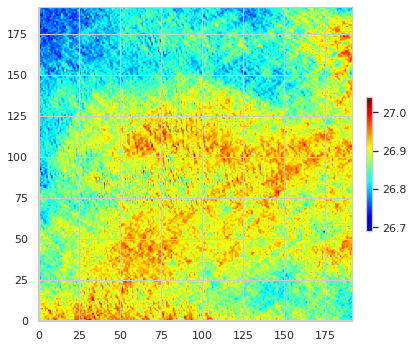

In [17]:
plt_ex(high)

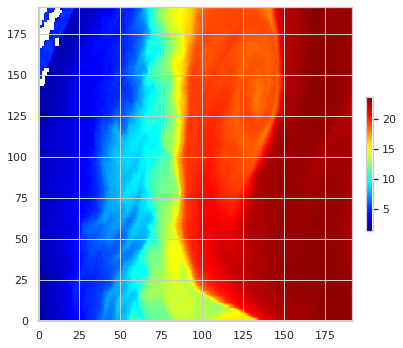

In [18]:
plt_ex(low)

In [12]:
high = 's3://viirs/data/2015/286/20151013041000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc'
low = 's3://viirs/data/2015/067/20150308073000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc'

In [13]:
dshigh = xarray.open_dataset(ulmo_io.open(high,'rb'))
dslow = xarray.open_dataset(ulmo_io.open(low,'rb'))

/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


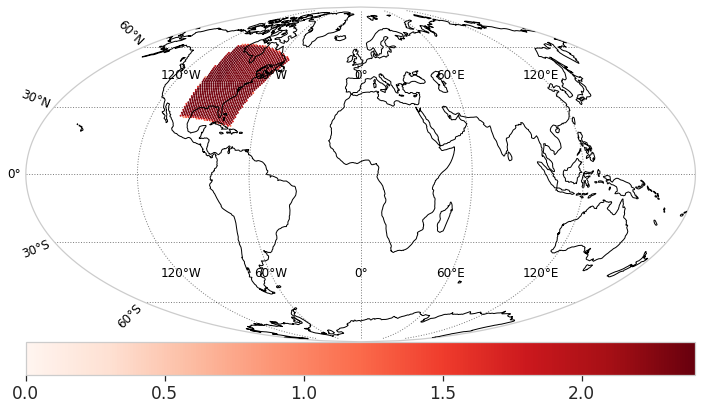

In [14]:
_ = ulmo_figs.show_spatial(dslow)

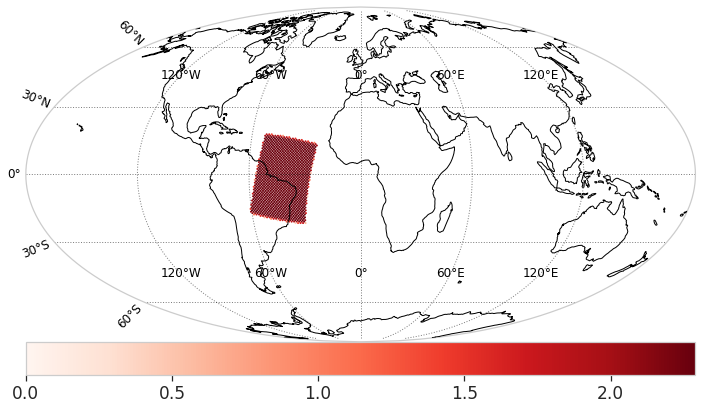

In [15]:
_ = ulmo_figs.show_spatial(dshigh)

## 2016 Check

In [5]:

modis_tbl = ulmo_io.load_main_table('s3://modis-l2/Tables/MODIS_L2_std.parquet')
modis2016 = np.where(modis_tbl.pp_file == 's3://modis-l2/PreProc/MODIS_R2019_2016_95clear_128x128_preproc_std.h5')
modis_tbl16 = modis_tbl[modis2016[0][0]:modis2016[0][-1]]

viirs_tbl16 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2016_std.parquet')

Read main table: s3://modis-l2/Tables/MODIS_L2_std.parquet
Read main table: s3://viirs/Tables/VIIRS_2016_std.parquet


In [21]:
viirs_tbl16.head()

filename   row   col        lat  \
0  s3://viirs/data/2016/001/20160101000000-OSPO-L...  2448   768  18.072535   
1  s3://viirs/data/2016/001/20160101000000-OSPO-L...  2451   672  18.195986   
2  s3://viirs/data/2016/001/20160101000000-OSPO-L...  2460   576  18.369888   
3  s3://viirs/data/2016/001/20160101000000-OSPO-L...  2471   550  18.475002   
4  s3://viirs/data/2016/001/20160101000000-OSPO-L...  3031  1344  21.231320   

         lon  clear_fraction  field_size   datetime  \
0 -156.15631        0.026910         192 2016-01-01   
1 -155.28226        0.048340         192 2016-01-01   
2 -154.27640        0.048557         192 2016-01-01   
3 -153.98338        0.049995         192 2016-01-01   
4 -161.92795        0.049967         192 2016-01-01   

                                         ex_filename  \
0  s3://viirs/Extractions/VIIRS_2016_95clear_192x...   
1  s3://viirs/Extractions/VIIRS_2016_95clear_192x...   
2  s3://viirs/Extractions/VIIRS_2016_95clear_192x...   
3  s3://viirs/Extractions/VIIRS_2016_95clear_192x...   
4  s3://viirs/Extractions/VIIRS_2016_95clear_192x...   

                                             pp_file    pp_root  pp_idx  \
0  s3://viirs/PreProc/VIIRS_2016_95clear_192x192_...  viirs_std  947615   
1  s3://viirs/PreProc/VIIRS_2016_95clear_192x192_...  viirs_std  782004   
2  s3://viirs/PreProc/VIIRS_2016_95clear_192x192_...  viirs_std  493599   
3  s3://viirs/PreProc/VIIRS_2016_95clear_192x192_...  viirs_std  314846   
4  s3://viirs/PreProc/VIIRS_2016_95clear_192x192_...  viirs_std   60432   

   pp_type  mean_temperature       Tmin       Tmax        T90        T10  \
0        0         26.094532  25.070007  26.619995  26.239990  25.950012   
1        0         25.967422  24.649994  26.619995  26.179993  25.730011   
2        0         25.815350  23.679993  26.529999  26.000000  25.619509   
3        0         25.763845  23.679993  26.529999  25.980011  25.549988   
4        0         25.432808  24.049988  26.410004  26.160004  24.869995   

           LL  
0  763.726074  
1  564.171509  
2  542.903137  
3  463.872986  
4  294.800842

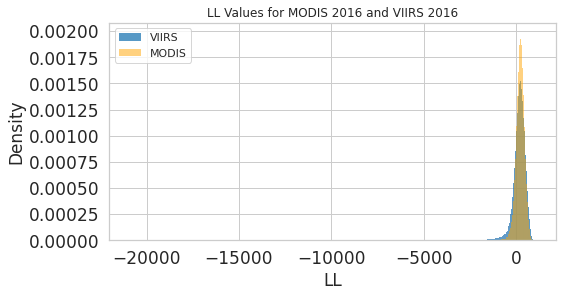

In [8]:
fig = plt.figure(figsize=(8,4))
ax = sns.histplot(data=viirs_tbl16, x='LL',alpha=0.75, stat='density',label = 'VIIRS')
ax = sns.histplot(data=modis_tbl16, x='LL',color='orange',alpha=0.5, stat='density',label = 'MODIS')
plotting.set_fontsize(ax, 17.)
plt.title('LL Values for MODIS 2016 and VIIRS 2016')
plt.legend()
plt.show()

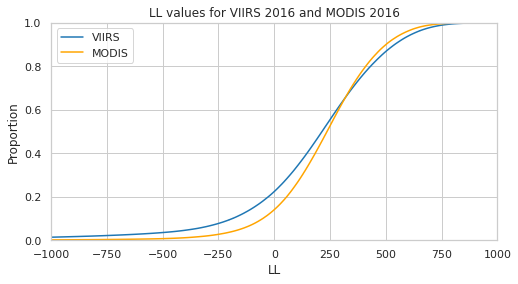

In [15]:
fig = plt.figure(figsize=(8,4))

ax = sns.ecdfplot(data=viirs_tbl16, x='LL',label = 'VIIRS',stat='proportion') 
sns.ecdfplot(data=modis_tbl16, x='LL', color='orange', ax=ax,label = 'MODIS',stat='proportion')
plt.title('LL values for VIIRS 2016 and MODIS 2016')
ax.set_xlim(-1000,1000)
plt.legend()
plt.show()

In [ ]:
fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl16, x='LL')
plotting.set_fontsize(ax, 17.)
plt.show()

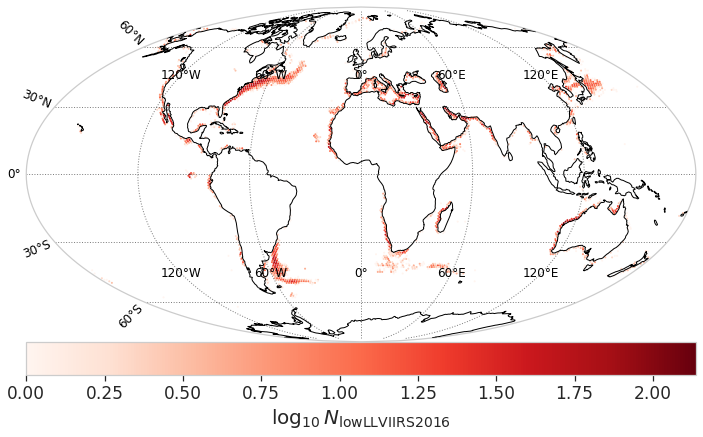

In [44]:
low_LL_V = viirs_tbl16.LL < -1000.
_ = ulmo_figs.show_spatial(viirs_tbl16[low_LL_V], lbl='low LL VIIRS 2016')

/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


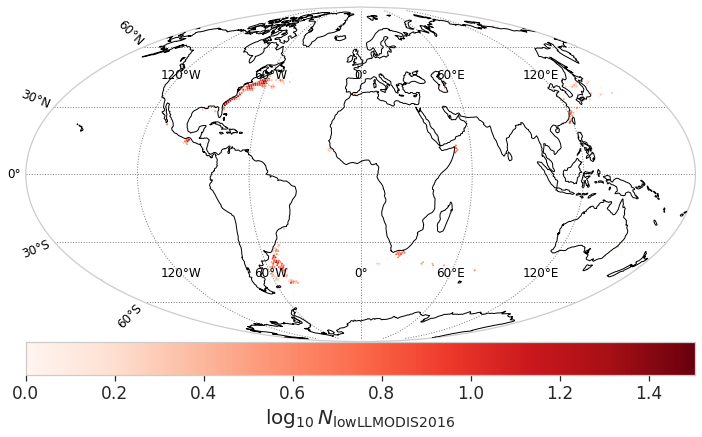

In [3]:
low_LL_V = modis_tbl16.LL < -1000.
_ = ulmo_figs.show_spatial(modis_tbl16[low_LL_V], lbl='low LL MODIS 2016')

/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


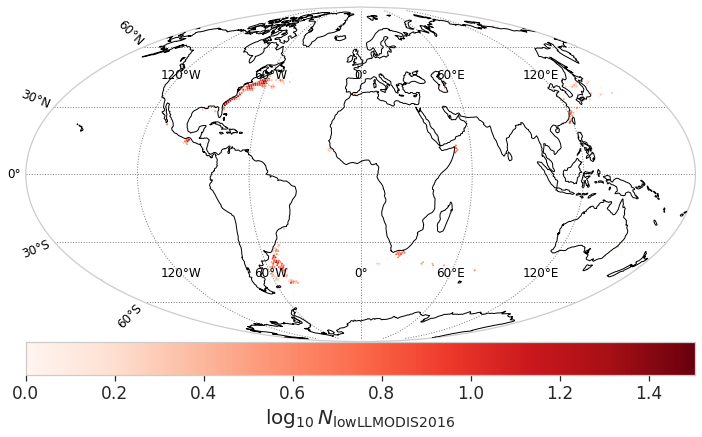

In [13]:
low_LL_V = (modis_tbl16.LL.values < -1000)
_ = ulmo_figs.show_spatial(modis_tbl16[low_LL_V], lbl='low LL MODIS 2016')

In [62]:
LL = []
for i in range (len(viirs_tbl16)):
    logs = viirs_tbl16.iloc[i].LL
    LL.append(logs)

In [15]:
LL_M = []
for i in range (len(modis_tbl16)):
    logs = modis_tbl16.iloc[i].LL
    LL_M.append(logs)

In [28]:
ex_file = 's3://viirs/Extractions/VIIRS_2016_95clear_192x192_inpaint.h5'

with ulmo_io.open(ex_file, 'rb') as f:
    ex_hf = h5py.File(f, 'r')

In [17]:
ex_file_m = 's3://modis-l2/Extractions/MODIS_R2019_2011_day_95clear_128x128_inpaint.h5'

with ulmo_io.open(ex_file_m, 'rb') as f:
    ex_hf_m = h5py.File(f, 'r')

In [30]:
index1 = LL.index(max(LL))
index2 = LL.index(min(LL))
print('The index the highest LL value is', index1)
print('The index the lowest LL value is', index2)

high = ex_hf['metadata'][741225,]
low =  ex_hf['metadata'][279287,]

NameError: name 'LL' is not defined

In [16]:
index1 = LL_M.index(max(LL_M))
index2 = LL_M.index(min(LL_M))
print('The index the highest LL value is', index1)
print('The index the lowest LL value is', index2)

high = ex_hf_m['metadata'][391051,]
low =  ex_hf_m['metadata'][354700,]

The index the highest LL value is 391051
The index the lowest LL value is 354700


NameError: name 'ex_hf_m' is not defined

In [29]:
np.where(ex_hf_m['metadata'][:][0]=='AQUA_MODIS.20160825T214510.L2.SST.nc')

KeyboardInterrupt: 

In [64]:
print(viirs_tbl16.iloc[index1].filename)
print(viirs_tbl16.iloc[index2].filename)

s3://viirs/data/2016/238/20160825220000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc
s3://viirs/data/2016/089/20160329175000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc


In [24]:
print(modis_tbl16.iloc[index1].filename)
print(modis_tbl16.iloc[index2].filename)

AQUA_MODIS.20160825T214510.L2.SST.nc
AQUA_MODIS.20160213T070510.L2.SST.nc


In [31]:
high =  ex_hf['fields'][741225,...]
low = ex_hf['fields'][279287,...]

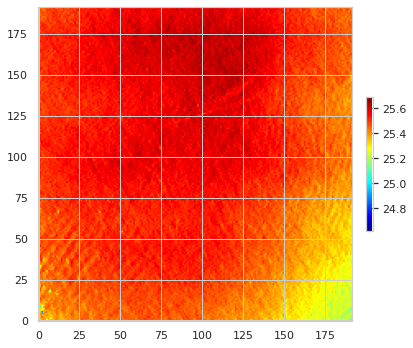

In [32]:
plt_ex(high)

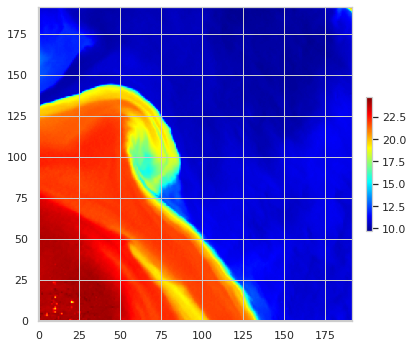

In [33]:
plt_ex(low)

In [8]:
high = ex_hf_m['fields'][391051,]
low =  ex_hf_m['fields'][353487,]
random = ex_hf_m['fields'][374700,]

In [64]:
mins = min(modis_tbl.LL.values)
maxs = max(modis_tbl.LL.values)

np.where(modis_tbl.LL.values <= mins+400)
#print(mins)

(array([ 149513,  193933,  251303, 3364156, 5744302]),)

In [57]:
np.where(modis_tbl.LL.values >= maxs-0.00000025)

(array([1132361]),)

In [86]:
test = (modis_tbl.row.values == 1360) & (modis_tbl.col.values == 389) & (modis_tbl.clear_fraction.values == 0.01727294921875)
modis_tbl[test].head()

lat        lon  col            datetime          LL   row  \
5779972  11.90849 -98.184850  389 2010-03-31 08:05:00  308.717834  1360   
8428950 -48.02273 -61.884224  389 2014-01-23 04:50:00  219.276978  1360   

         clear_fraction  mean_temperature       Tmin       Tmax        T90  \
5779972        0.017273         28.549412  27.434999  29.324999  28.869999   
8428950        0.017273         10.697462   7.255000  13.005000  11.830000   

               T10                              filename                 UID  \
5779972  28.209999  AQUA_MODIS.20100331T080507.L2.SST.nc  127010190858181515   
8428950   9.740000  AQUA_MODIS.20140123T045008.L2.SST.nc  139041977311811578   

                                                   pp_file   pp_root  \
5779972  s3://modis-l2/PreProc/MODIS_R2019_2010_95clear...  standard   
8428950  s3://modis-l2/PreProc/MODIS_R2019_2014_95clear...  standard   

         field_size  pp_type  pp_idx  
5779972         128        0  509301  
8428950         128        0  438530

In [80]:
ex_hf_m['metadata'][374700]

array([b'AQUA_MODIS.20110824T112008.L2.SST.nc', b'1360', b'389',
       b'-34.497784', b'41.145954', b'0.01727294921875'], dtype='|S36')

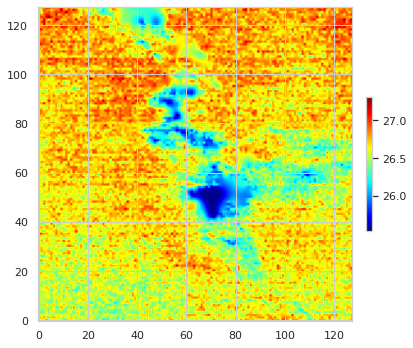

In [76]:
plt_ex(ex_hf_m['fields'][336416,])

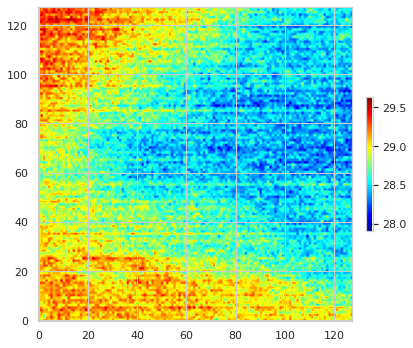

In [33]:
plt_ex(high)

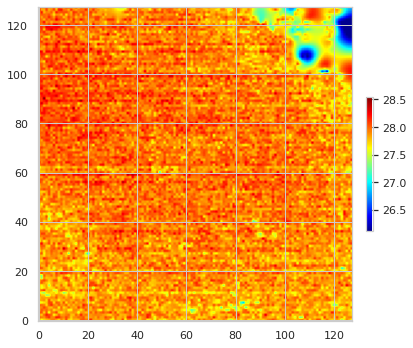

In [34]:
plt_ex(low)

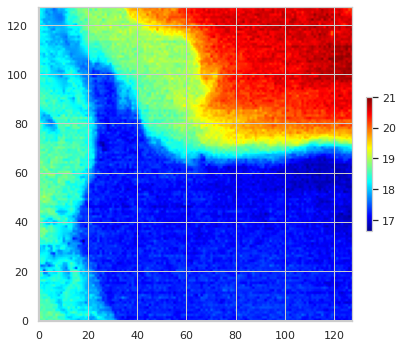

In [36]:
plt_ex(random)

In [34]:
high = 's3://viirs/data/2016/238/20160825220000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc'
low = 's3://viirs/data/2016/089/20160329175000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc'

In [35]:
dshigh = xarray.open_dataset(ulmo_io.open(high,'rb'))
dslow = xarray.open_dataset(ulmo_io.open(low,'rb'))

/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


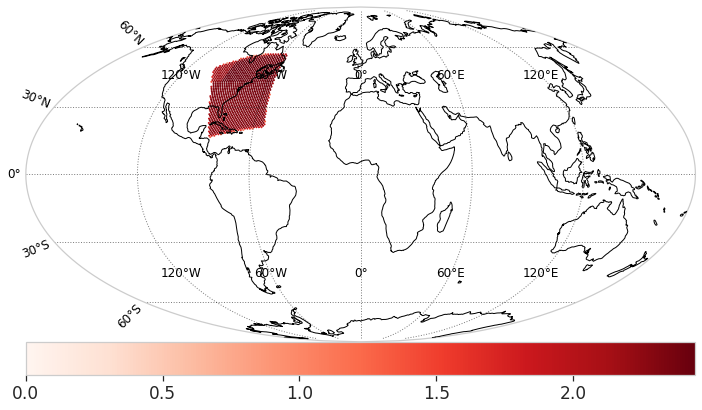

In [36]:
_ = ulmo_figs.show_spatial(dslow)

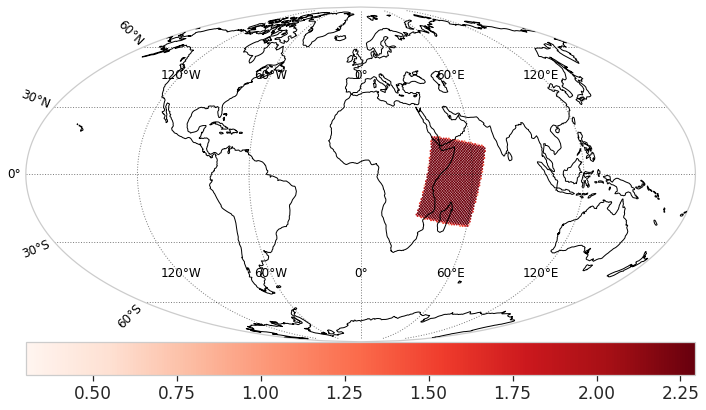

In [37]:
_ = ulmo_figs.show_spatial(dshigh)

## 2017 Check

In [38]:
viirs_tbl17 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2017_std.parquet')

Read main table: s3://viirs/Tables/VIIRS_2017_std.parquet


In [39]:
viirs_tbl17.head()

filename  row  col        lat  \
0  s3://viirs/data/2017/001/20170101002000-OSPO-L...  253  864 -53.484930   
1  s3://viirs/data/2017/001/20170101002000-OSPO-L...  287  811 -53.124584   
2  s3://viirs/data/2017/001/20170101002000-OSPO-L...  336  864 -52.983170   
3  s3://viirs/data/2017/001/20170101002000-OSPO-L...  383  789 -52.479202   
4  s3://viirs/data/2017/001/20170101002000-OSPO-L...  432  864 -52.401833   

         lon  clear_fraction  field_size            datetime  \
0 -142.80884        0.049208         192 2017-01-01 00:20:00   
1 -142.33246        0.049750         192 2017-01-01 00:20:00   
2 -143.18716        0.010878         192 2017-01-01 00:20:00   
3 -142.50323        0.049533         192 2017-01-01 00:20:00   
4 -143.61517        0.019368         192 2017-01-01 00:20:00   

                                         ex_filename  \
0  s3://viirs/Extractions/VIIRS_2017_95clear_192x...   
1  s3://viirs/Extractions/VIIRS_2017_95clear_192x...   
2  s3://viirs/Extractions/VIIRS_2017_95clear_192x...   
3  s3://viirs/Extractions/VIIRS_2017_95clear_192x...   
4  s3://viirs/Extractions/VIIRS_2017_95clear_192x...   

                                             pp_file    pp_root   pp_idx  \
0  s3://viirs/PreProc/VIIRS_2017_95clear_192x192_...  viirs_std  1037981   
1  s3://viirs/PreProc/VIIRS_2017_95clear_192x192_...  viirs_std   289660   
2  s3://viirs/PreProc/VIIRS_2017_95clear_192x192_...  viirs_std  1012333   
3  s3://viirs/PreProc/VIIRS_2017_95clear_192x192_...  viirs_std  1094893   
4  s3://viirs/PreProc/VIIRS_2017_95clear_192x192_...  viirs_std   289371   

   pp_type  mean_temperature      Tmin       Tmax        T90       T10  \
0        0          9.191571  7.250000  10.989990  10.010010  8.540009   
1        0          9.699532  8.339996  11.339996  10.559998  8.750000   
2        0          9.267763  8.160004  10.989990  10.209991  8.589996   
3        0         10.072083  8.179993  11.609985  11.119995  8.820007   
4        0          9.664635  8.149994  11.089996  10.450012  8.679993   

           LL  
0  113.713623  
1  173.058105  
2  229.563232  
3   58.421265  
4  136.728394

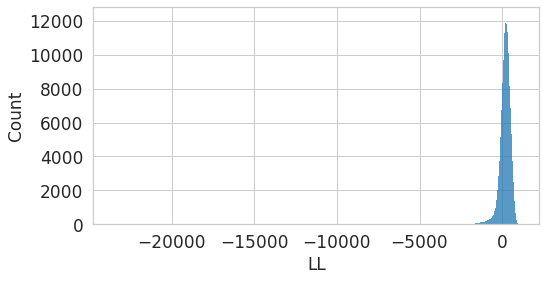

In [40]:
fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl17, x='LL')
plotting.set_fontsize(ax, 17.)
plt.show()

/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


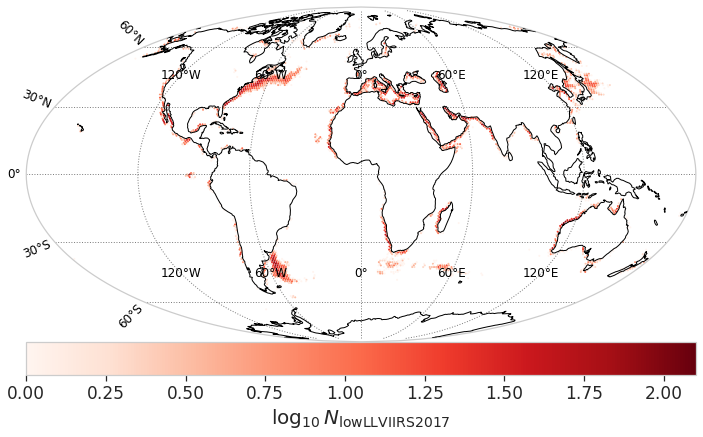

In [42]:
low_LL_V = viirs_tbl17.LL < -1000.
_ = ulmo_figs.show_spatial(viirs_tbl17[low_LL_V], lbl='low LL VIIRS 2017')

In [45]:
LL = []
for i in range (len(viirs_tbl17)):
    logs = viirs_tbl17.iloc[i].LL
    LL.append(logs)

In [46]:
ex_file = 's3://viirs/Extractions/VIIRS_2017_95clear_192x192_inpaint.h5'

with ulmo_io.open(ex_file, 'rb') as f:
    ex_hf = h5py.File(f, 'r')

In [53]:
index1 = LL.index(max(LL))
index2 = LL.index(min(LL))
print('The index the highest LL value is', index1)
print('The index the lowest LL value is', index2)

high = ex_hf['metadata'][196046,]
low =  ex_hf['metadata'][236605,]

The index the highest LL value is 196046
The index the lowest LL value is 236605


In [54]:
print(viirs_tbl17.iloc[index1].filename)
print(viirs_tbl17.iloc[index2].filename)

s3://viirs/data/2017/054/20170223114000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc
s3://viirs/data/2017/065/20170306062000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc


In [59]:
high =  ex_hf['fields'][196046,...]
low = ex_hf['fields'][279287,...]

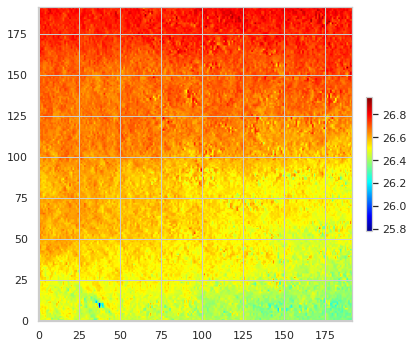

In [60]:
plt_ex(high)

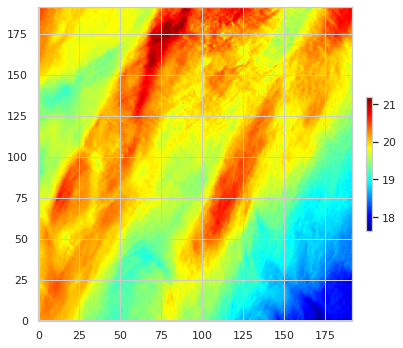

In [61]:
plt_ex(low)

In [ ]:
print(viirs_tbl17.iloc[index1].filename)
print(viirs_tbl17.iloc[index2].filename)

In [55]:
high = 's3://viirs/data/2017/054/20170223114000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc'
low = 's3://viirs/data/2017/065/20170306062000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc'

In [56]:
dshigh = xarray.open_dataset(ulmo_io.open(high,'rb'))
dslow = xarray.open_dataset(ulmo_io.open(low,'rb'))

/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


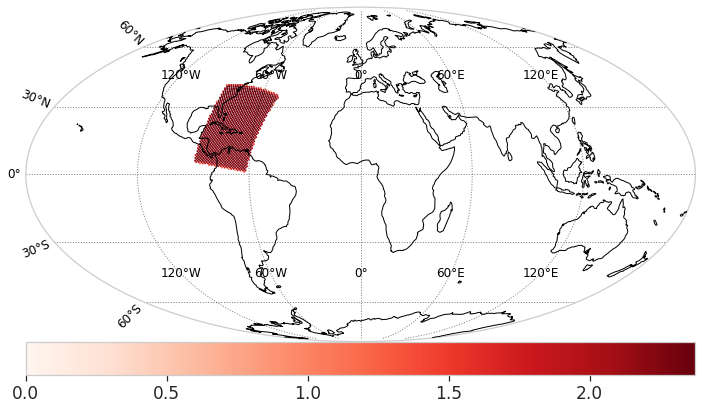

In [57]:
_ = ulmo_figs.show_spatial(dslow)

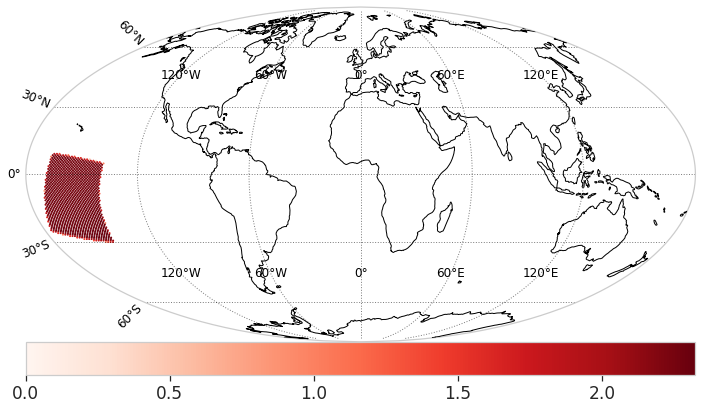

In [58]:
_ = ulmo_figs.show_spatial(dshigh)

## 2018 Check

In [3]:
viirs_tbl18 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2018_std.parquet')

Read main table: s3://viirs/Tables/VIIRS_2018_std.parquet


In [4]:
viirs_tbl18.head()

filename  row   col        lat  \
0  s3://viirs/data/2018/001/20180101000000-OSPO-L...    5   192  30.934402   
1  s3://viirs/data/2018/001/20180101000000-OSPO-L...   45    47  31.278969   
2  s3://viirs/data/2018/001/20180101000000-OSPO-L...   48    96  31.269611   
3  s3://viirs/data/2018/001/20180101000000-OSPO-L...  821  2304  33.561930   
4  s3://viirs/data/2018/001/20180101000000-OSPO-L...  840  2208  33.885994   

         lon  clear_fraction  field_size   datetime  \
0 -151.71007        0.049235         192 2018-01-01   
1 -150.07703        0.049940         192 2018-01-01   
2 -150.68950        0.035021         192 2018-01-01   
3 -172.82875        0.048177         192 2018-01-01   
4 -171.93727        0.049506         192 2018-01-01   

                                         ex_filename  \
0  s3://viirs/Extractions/VIIRS_2018_95clear_192x...   
1  s3://viirs/Extractions/VIIRS_2018_95clear_192x...   
2  s3://viirs/Extractions/VIIRS_2018_95clear_192x...   
3  s3://viirs/Extractions/VIIRS_2018_95clear_192x...   
4  s3://viirs/Extractions/VIIRS_2018_95clear_192x...   

                                             pp_file    pp_root   pp_idx  \
0  s3://viirs/PreProc/VIIRS_2018_95clear_192x192_...  viirs_std   332137   
1  s3://viirs/PreProc/VIIRS_2018_95clear_192x192_...  viirs_std  1074700   
2  s3://viirs/PreProc/VIIRS_2018_95clear_192x192_...  viirs_std   768942   
3  s3://viirs/PreProc/VIIRS_2018_95clear_192x192_...  viirs_std   521993   
4  s3://viirs/PreProc/VIIRS_2018_95clear_192x192_...  viirs_std  1086775   

   pp_type  mean_temperature       Tmin       Tmax        T90        T10  \
0        0         19.050865  17.079987  20.839996  19.529999  18.230011   
1        0         19.690781  17.540009  21.899994  20.290009  19.130005   
2        0         19.462822  17.309998  21.899994  20.239990  18.559998   
3        0         17.740763  16.299988  19.070007  18.609985  17.000000   
4        0         17.250992  15.000000  18.839996  18.230011  16.540009   

           LL  
0   90.401733  
1  -12.377075  
2   50.295959  
3  231.610474  
4  182.238342

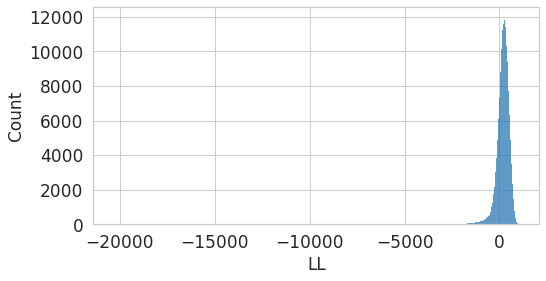

In [5]:
fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl18, x='LL')
plotting.set_fontsize(ax, 17.)
plt.show()

/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


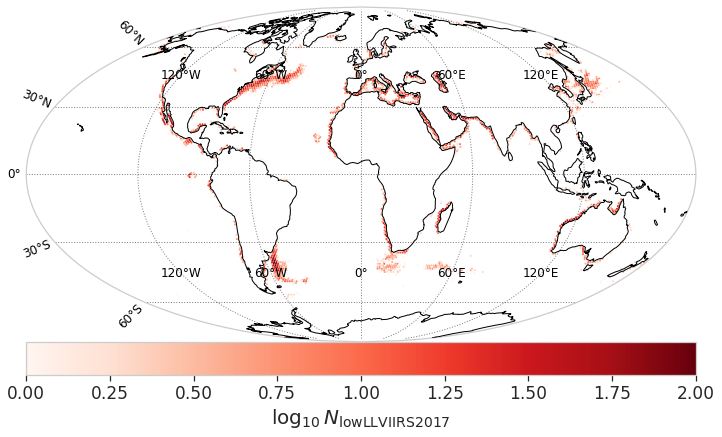

In [6]:
low_LL_V = viirs_tbl18.LL < -1000.
_ = ulmo_figs.show_spatial(viirs_tbl18[low_LL_V], lbl='low LL VIIRS 2017')

In [7]:
LL = []
for i in range (len(viirs_tbl18)):
    logs = viirs_tbl18.iloc[i].LL
    LL.append(logs)

In [8]:
ex_file = 's3://viirs/Extractions/VIIRS_2018_95clear_192x192_inpaint.h5'

with ulmo_io.open(ex_file, 'rb') as f:
    ex_hf = h5py.File(f, 'r')

In [9]:
index1 = LL.index(max(LL))
index2 = LL.index(min(LL))
print('The index the highest LL value is', index1)
print('The index the lowest LL value is', index2)

The index the highest LL value is 995505
The index the lowest LL value is 384708


In [16]:
high =  ex_hf['fields'][995505,...]
low = ex_hf['fields'][384708,...]

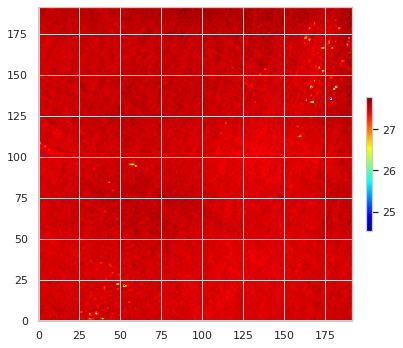

In [17]:
plt_ex(high)

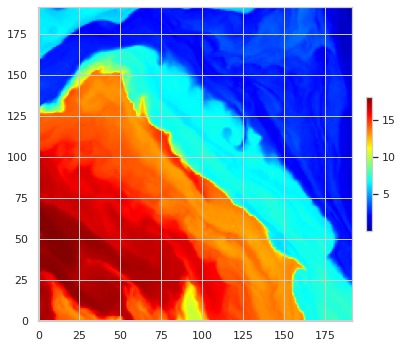

In [18]:
plt_ex(low)

In [32]:
print(viirs_tbl18.iloc[index1].filename)
print(viirs_tbl18.iloc[index2].filename)

s3://viirs/data/2018/268/20180925173000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc
s3://viirs/data/2018/174/20180623054000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc


In [33]:
high = 's3://viirs/data/2018/268/20180925173000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc'
low = 's3://viirs/data/2018/174/20180623054000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc'

In [34]:
dshigh = xarray.open_dataset(ulmo_io.open(high,'rb'))
dslow = xarray.open_dataset(ulmo_io.open(low,'rb'))

/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


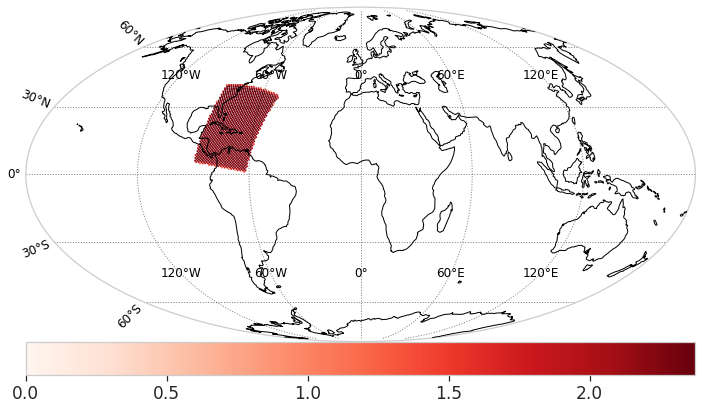

In [21]:
_ = ulmo_figs.show_spatial(dslow)

## 2019 Check

In [35]:
viirs_tbl19 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2019_std.parquet')

Read main table: s3://viirs/Tables/VIIRS_2019_std.parquet


In [23]:
viirs_tbl19.head()

filename   row  col        lat  \
0  s3://viirs/data/2019/001/20190101000000-OSPO-L...  3696  260 -28.811947   
1  s3://viirs/data/2019/001/20190101000000-OSPO-L...  3696  288 -28.873466   
2  s3://viirs/data/2019/001/20190101000000-OSPO-L...  3744  265 -29.121992   
3  s3://viirs/data/2019/001/20190101000000-OSPO-L...  3760  288 -29.272427   
4  s3://viirs/data/2019/001/20190101000000-OSPO-L...  4211  960 -33.541280   

        lon  clear_fraction  field_size   datetime  \
0  2.893207        0.048069         192 2019-01-01   
1  3.139442        0.015462         192 2019-01-01   
2  2.816050        0.049208         192 2019-01-01   
3  2.978308        0.048340         192 2019-01-01   
4  8.173760        0.049533         192 2019-01-01   

                                         ex_filename  \
0  s3://viirs/Extractions/VIIRS_2019_95clear_192x...   
1  s3://viirs/Extractions/VIIRS_2019_95clear_192x...   
2  s3://viirs/Extractions/VIIRS_2019_95clear_192x...   
3  s3://viirs/Extractions/VIIRS_2019_95clear_192x...   
4  s3://viirs/Extractions/VIIRS_2019_95clear_192x...   

                                             pp_file    pp_root  pp_idx  \
0  s3://viirs/PreProc/VIIRS_2019_95clear_192x192_...  viirs_std  108051   
1  s3://viirs/PreProc/VIIRS_2019_95clear_192x192_...  viirs_std  343266   
2  s3://viirs/PreProc/VIIRS_2019_95clear_192x192_...  viirs_std  282308   
3  s3://viirs/PreProc/VIIRS_2019_95clear_192x192_...  viirs_std  366172   
4  s3://viirs/PreProc/VIIRS_2019_95clear_192x192_...  viirs_std  992106   

   pp_type  mean_temperature       Tmin       Tmax        T90        T10  \
0        0         22.879852  21.350006  24.160004  23.160004  22.589996   
1        0         22.829689  21.350006  23.799988  23.116087  22.489990   
2        0         22.807367  21.350006  24.019989  23.170013  22.320007   
3        0         22.710859  21.350006  23.799988  23.109985  22.170013   
4        0         20.786270  18.920013  21.779999  21.190002  20.310646   

           LL  
0  209.144287  
1  259.388367  
2  134.114136  
3  144.690002  
4  282.890869

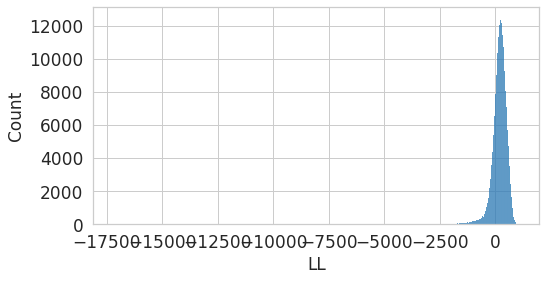

In [24]:
fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl19, x='LL')
plotting.set_fontsize(ax, 17.)
plt.show()

/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


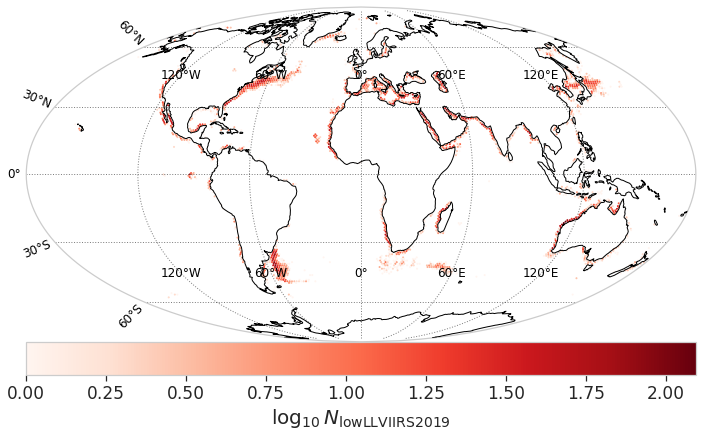

In [25]:
low_LL_V = viirs_tbl19.LL < -1000.
_ = ulmo_figs.show_spatial(viirs_tbl19[low_LL_V], lbl='low LL VIIRS 2019')

In [36]:
LL = []
for i in range (len(viirs_tbl19)):
    logs = viirs_tbl19.iloc[i].LL
    LL.append(logs)

In [37]:
ex_file = 's3://viirs/Extractions/VIIRS_2019_95clear_192x192_inpaint.h5'

with ulmo_io.open(ex_file, 'rb') as f:
    ex_hf = h5py.File(f, 'r')

In [38]:
index1 = LL.index(max(LL))
index2 = LL.index(min(LL))
print('The index the highest LL value is', index1)
print('The index the lowest LL value is', index2)

The index the highest LL value is 829328
The index the lowest LL value is 546378


In [29]:
high =  ex_hf['fields'][829328,...]
low = ex_hf['fields'][546378,...]

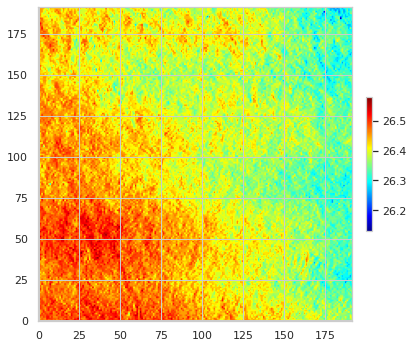

In [30]:
plt_ex(high)

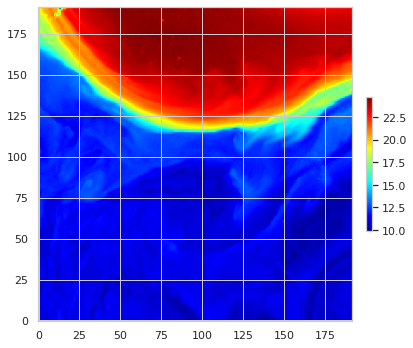

In [31]:
plt_ex(low)

In [40]:
print(viirs_tbl19.iloc[index1].filename)
print(viirs_tbl19.iloc[index2].filename)

s3://viirs/data/2019/252/20190909214000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc
s3://viirs/data/2019/162/20190611061000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc


In [41]:
high = 's3://viirs/data/2019/252/20190909214000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc'
low = 's3://viirs/data/2019/162/20190611061000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc'

In [42]:
dshigh = xarray.open_dataset(ulmo_io.open(high,'rb'))
dslow = xarray.open_dataset(ulmo_io.open(low,'rb'))

In [ ]:
_ = ulmo_figs.show_spatial(dslow)

## 2020 Check

In [ ]:
viirs_tbl20 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2020_std.parquet')

In [ ]:
viirs_tbl20.head()

In [ ]:
fig = plt.figure(figsize=(8,4))

ax = sns.histplot(data=viirs_tbl20, x='LL')
plotting.set_fontsize(ax, 17.)
plt.show()

In [ ]:
low_LL_V = viirs_tbl20.LL < -1000.
_ = ulmo_figs.show_spatial(viirs_tbl20[low_LL_V], lbl='low LL VIIRS 2020')

In [ ]:
LL = []
for i in range (len(viirs_tbl20)):
    logs = viirs_tbl20.iloc[i].LL
    LL.append(logs)

In [ ]:
ex_file = 's3://viirs/Extractions/VIIRS_2020_95clear_192x192_inpaint.h5'

with ulmo_io.open(ex_file, 'rb') as f:
    ex_hf = h5py.File(f, 'r')

In [ ]:
index1 = LL.index(max(LL))
index2 = LL.index(min(LL))
print('The index the highest LL value is', index1)
print('The index the lowest LL value is', index2)

In [ ]:
high =  ex_hf['fields'][196046,...]
low = ex_hf['fields'][279287,...]

In [ ]:
plt_ex(high)

In [ ]:
plt_ex(low)

In [ ]:
high = 's3://viirs/data/2017/054/20170223114000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc'
low = 's3://viirs/data/2017/065/20170306062000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc'

In [ ]:
dshigh = xarray.open_dataset(ulmo_io.open(high,'rb'))
dslow = xarray.open_dataset(ulmo_io.open(low,'rb'))

In [ ]:
_ = ulmo_figs.show_spatial(dslow)